# Applied Mathematics for Computer Science(2016~2017)

## Homework1. Polynomial Curve Fitting.

### Goal

Implement polynomial curve fitting in python and with TensorFlow (optionally).

### Request

1. sample the function curve of $y=\textrm{sin}(x)$ with Gaussian noise

2. fit degree 3 and 9 curves in 10 samples

3. fit degree 9 curves in 15 and 100 samples

4. fit degree 9 curve in 10 samples but with **regularization term**

In [1]:
# Author: Li Bin
# ID card: 11531041.
# Time: 2017/2/28

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
class Curve_fitting(object):
    """A wrapper for curve fitting.
    
    # Args:
        1. n_samples: scalar value, decide how many samples do we need in this simple model.
        2. order: scalar value, decide which order you want to fit.
        3. regular: bool, whether we use regularization or not.
        
    # Return:
        1. pylab figure.
    """
    
    def __init__(self, n_samples, order, regular=False):
        self.n_samples = n_samples
        self.order = order
        self.regular = regular
        self.lamda = np.exp(-5)  # Regular parameter term.
    
    def _generate_sample(self):
        self.x_sample = np.linspace(0, 2*np.pi, self.n_samples)
        self.x_line = np.linspace(0, 2*np.pi, 1000)
        noise = (np.random.rand(self.n_samples) - .5) * 0.6
        self.y_sample = np.sin(self.x_sample) + noise
        self.y_line = np.sin(self.x_line)
    
    def _generate_design_matrix(self, x):
        """Expect vector m-by-1 vector, return m-by-n matrix, n is polynomial feature.
        """
        _x = [x**i for i in range(1,self.order+1)]
        return np.stack(_x, axis=1)
    
    def _least_square(self, X, y):
        """return w = (X^T * X)^(-1) * X^T * y
        """
        if self.regular:
            return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + self.lamda * np.eye(self.order)), X.T), y)
        else:
            return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    def show_result(self):
        self._generate_sample()
        # plot original samples.
        plt.scatter(self.x_sample, self.y_sample, color='w', linewidth=1.5,edgecolors='b', label='Samples')
        # plot original sin(x) lines.
        plt.plot(self.x_line, self.y_line, color='g', linewidth=2, label='True curve')
        # learn weights via least square.
        X = self._generate_design_matrix(self.x_sample)
        w = self._least_square(X, self.y_sample)
        # plot get y_estimation via weights.
        y_estimate = np.dot(self._generate_design_matrix(self.x_line), w)
        # plot estimate line.
        plt.plot(self.x_line, y_estimate, color='r', linewidth=2, label='Fitted curve')
        plt.legend(loc='lower left')
        plt.text(5, 0.7, '$M$ = {}\n$N$ = {}'.format(self.order, self.n_samples))
        plt.xlabel('$x$')
        plt.ylabel('$t$')
        plt.title("fit degree {} curves in {} samples".format(self.order, self.n_samples))

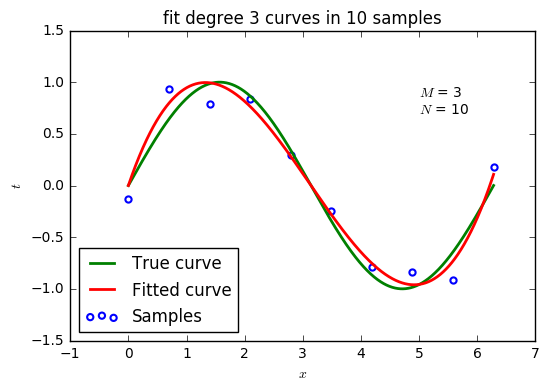

In [3]:
m3_n10 = Curve_fitting(10, 3)
m3_n10.show_result()

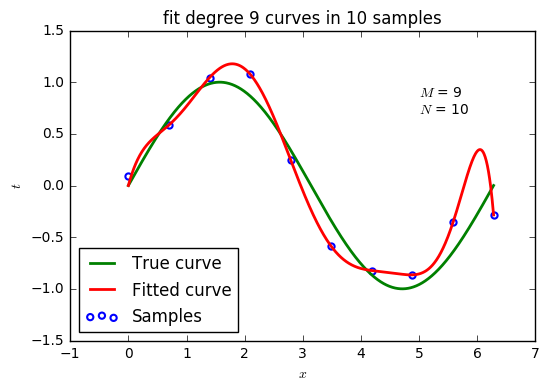

In [4]:
m9_n10 = Curve_fitting(10, 9)
m9_n10.show_result()

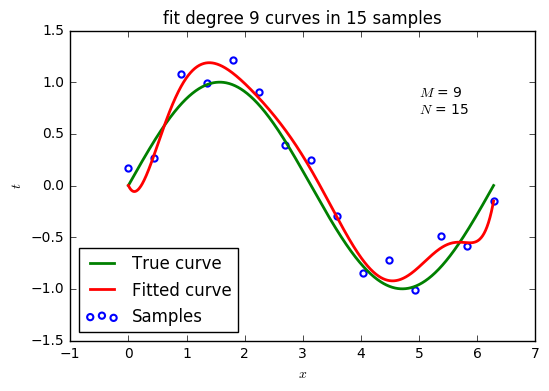

In [5]:
m9_n15 = Curve_fitting(15, 9)
m9_n15.show_result()

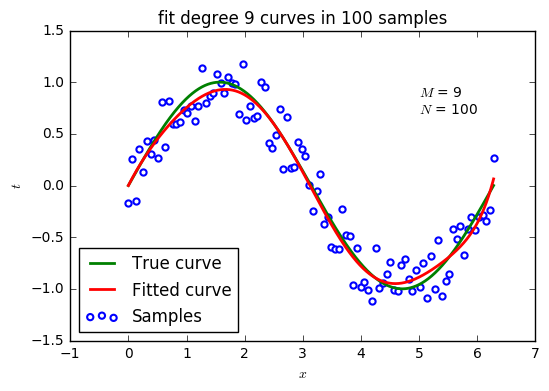

In [6]:
m9_n100 = Curve_fitting(100, 9)
m9_n100.show_result()

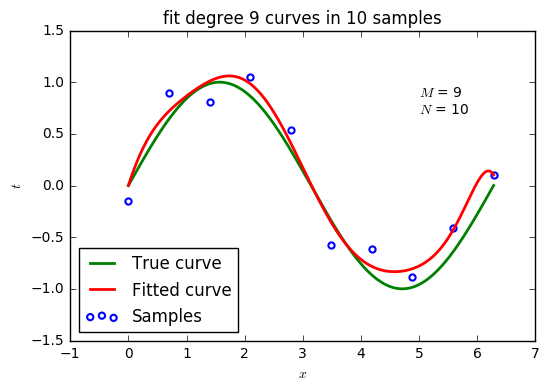

In [5]:
m9_n10_regular = Curve_fitting(10, 9, regular = True)
m9_n10_regular.show_result()